In [35]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [5]:
#read the csv file
df=pd.read_csv('Pokemon.csv',index_col=0)

In [6]:
#display 5 rows
df.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


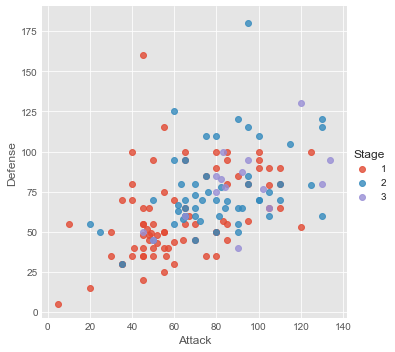

In [36]:
# scatter plot for defense vs attack
sns.lmplot(x='Attack',y='Defense', data=df,fit_reg=False, hue='Stage')
plt.show()

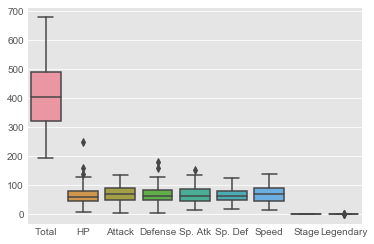

In [37]:
#create box plot
sns.boxplot(data=df)
plt.show()

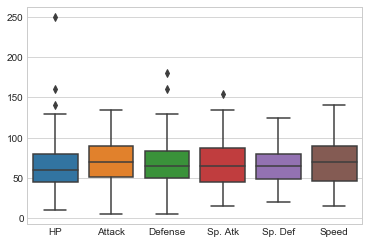

In [33]:
#remove total, stage, legendary

stats_df=df.drop(['Total','Stage','Legendary'],axis=1)

#new boxplot
sns.boxplot(data=stats_df)
plt.show()

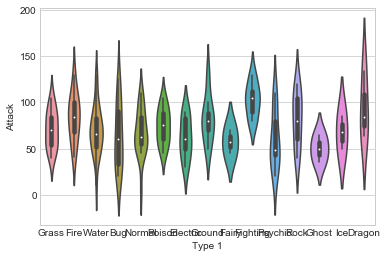

In [16]:
#set themes
sns.set_style('whitegrid')

#violinplot to show distribution of Attack vs Type 1

sns.violinplot(x='Type 1',y='Attack', data=df)
plt.show()

In [19]:
#change the color palette according to the nature
pkmn_type_colors=['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon 
                 ]

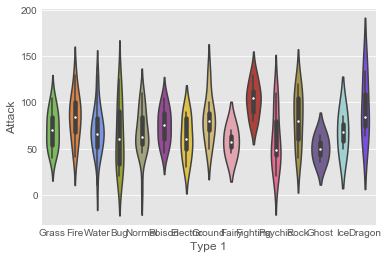

In [38]:
#plot violinplot again
sns.violinplot(x='Type 1',y='Attack',data=df, palette=pkmn_type_colors)
plt.show()

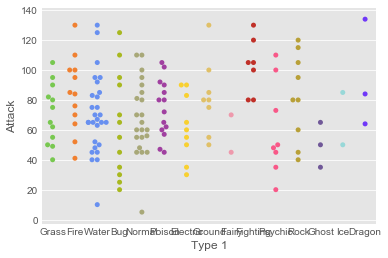

In [39]:
#plot swarm plot
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.show()

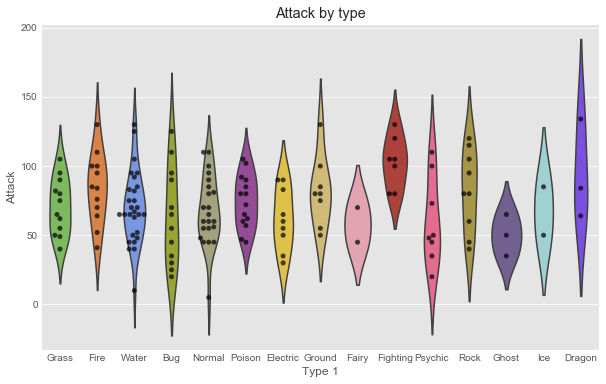

In [43]:
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
plt.title('Attack by type')
plt.show()

In [44]:
#melt all the variable except ID to show value in one graph

melted_df=pd.melt(stats_df,id_vars=["Name","Type 1", "Type 2"],var_name="Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [45]:
print stats_df.shape
print melted_df.shape

(151, 9)
(906, 5)


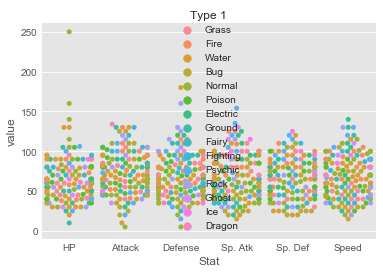

In [51]:
sns.swarmplot(x='Stat',y='value',data=melted_df, hue='Type 1')
plt.show()

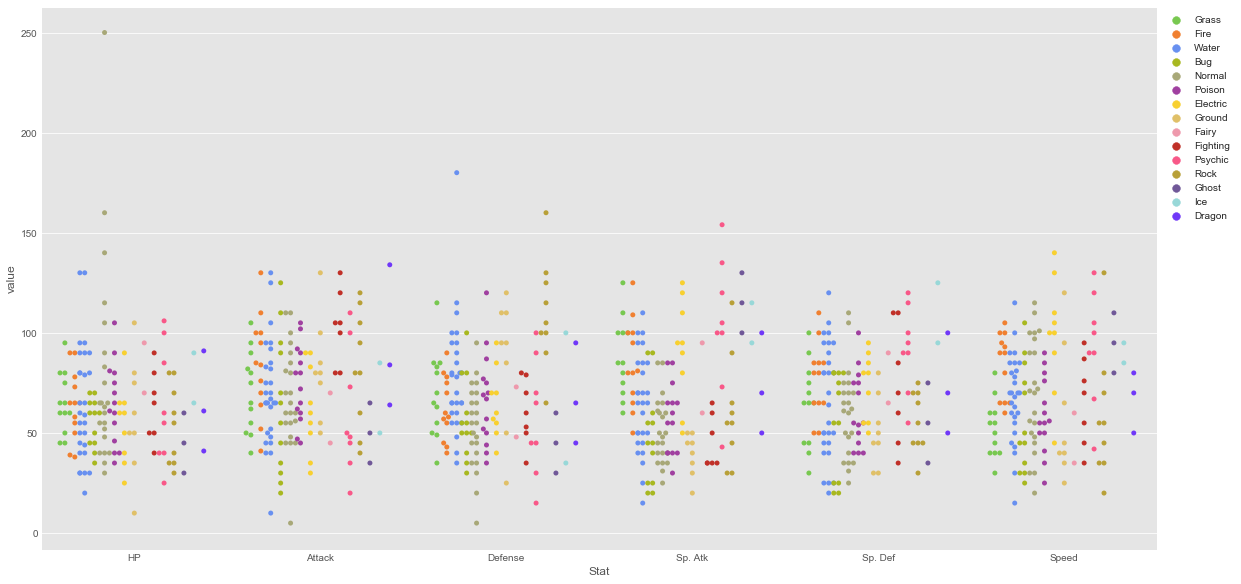

In [67]:
#make changes for readable graph
plt.figure(figsize=(20,10))
sns.swarmplot(x='Stat',y='value',data=melted_df,hue='Type 1', split=True, # separate point by hue
              palette=pkmn_type_colors)

#place legend to the right
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

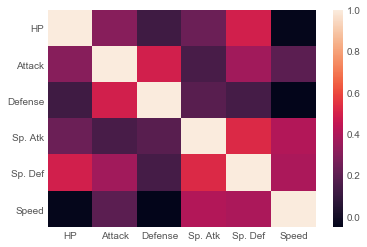

In [58]:
#calculate correlation 
corr=stats_df.corr()

#heatmap
sns.heatmap(corr)
plt.show()

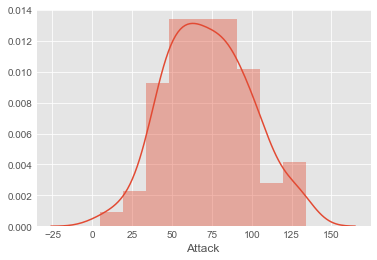

In [57]:
#histogram or distribution plot

sns.distplot(df.Attack)
plt.show()

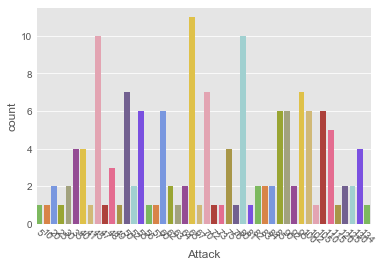

In [56]:
#bar plot
sns.countplot(x='Attack',data=df,palette=pkmn_type_colors)

#rotate x-labels
plt.xticks(rotation=-45)
plt.show()

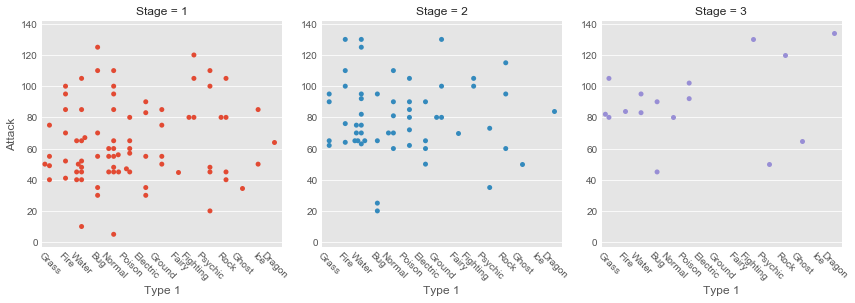

In [60]:
g=sns.factorplot(x='Type 1', y='Attack', data=df, hue='Stage',col='Stage', kind='swarm')
g.set_xticklabels(rotation=-45)
plt.show()

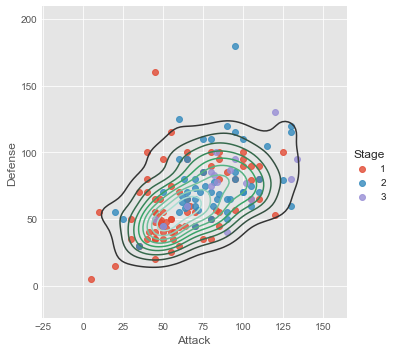

In [64]:
#density plot
sns.lmplot(x='Attack',y='Defense', data=df,fit_reg=False, hue='Stage')
sns.kdeplot(df.Attack,df.Defense)
plt.show()

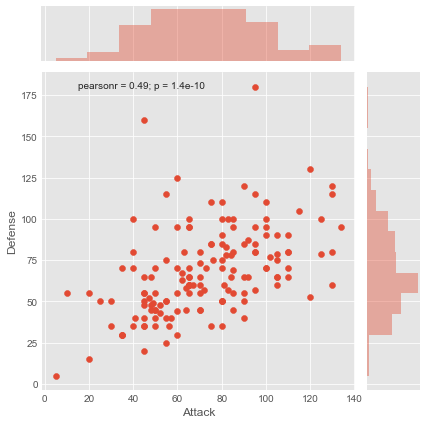

In [66]:
#joint distribution plot
sns.jointplot(x='Attack',y='Defense', data=df)
plt.show()